In [1]:
# Install the Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the data using pandas read functions
data=pd.read_csv('C://Users//Admin//Downloads//archive (2)//agroData.csv')
data.head()

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Himachal Pradesh,Sirmore,Paonta Sahib,Banana,Other,NaN,23/02/2023,5000.0,6000.0,5500.0
1,Himachal Pradesh,Sirmore,Paonta Sahib,Capsicum,Other,NaN,23/02/2023,2500.0,4000.0,3000.0
2,Himachal Pradesh,Sirmore,Paonta Sahib,French Beans (Frasbean),Other,NaN,23/02/2023,4000.0,5500.0,5000.0
3,Himachal Pradesh,Sirmore,Paonta Sahib,Kinnow,Other,NaN,23/02/2023,4500.0,6000.0,5000.0
4,Himachal Pradesh,Sirmore,Paonta Sahib,Leafy Vegetable,Other,NaN,23/02/2023,1000.0,NaN,1000.0


In [3]:
#Check the shape of the data
print(f'The data set contains {data.shape[1]} columns and {data.shape[0]} rows')

The data set contains 10 columns and 9918 rows


In [4]:
#Checking the data set information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9918 entries, 0 to 9917
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   State              9918 non-null   object 
 1   District           9918 non-null   object 
 2   Market             9918 non-null   object 
 3   Commodity          9918 non-null   object 
 4   Variety            9918 non-null   object 
 5   Grade              0 non-null      float64
 6   Arrival_Date       9918 non-null   object 
 7   Min_x0020_Price    9910 non-null   float64
 8   Max_x0020_Price    9878 non-null   float64
 9   Modal_x0020_Price  9918 non-null   float64
dtypes: float64(4), object(6)
memory usage: 775.0+ KB


In [5]:
# Checking the null values in the data
data.isna().sum()/len(data)*100

State                  0.000000
District               0.000000
Market                 0.000000
Commodity              0.000000
Variety                0.000000
Grade                100.000000
Arrival_Date           0.000000
Min_x0020_Price        0.080661
Max_x0020_Price        0.403307
Modal_x0020_Price      0.000000
dtype: float64

# Data Preprocessing:

In [6]:
# The Grade column contains 100 % null values and we remove it
# And print the average values for the remaining columns
data=data.drop(['Grade'],axis=1)
print('The Average values of the minimum price',data['Min_x0020_Price'].mean())
print('The Average values of the Maximumn price',data['Max_x0020_Price'].mean())

The Average values of the minimum price 3762.558096871847
The Average values of the Maximumn price 4428.146715934399


In [7]:
#fill the null values with average price
data['Min_x0020_Price'].fillna(data['Min_x0020_Price'].mean(),inplace=True)
data['Max_x0020_Price'].fillna(data['Min_x0020_Price'].mean(),inplace=True)

In [8]:
#Let's Checking the duplicate values in the data 
print('The duplicate values in the data is',data.duplicated().sum())

The duplicate values in the data is 0


In [9]:
#Checking the Stastics in the data
data.describe().style.background_gradient(cmap='gist_yarg_r')

,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
count,9918.000000,9918.000000,9918.000000
mean,3762.558097,4425.462350,4114.652279
std,11533.084132,13937.521087,12741.969488
min,1.000000,2.000000,2.000000
25%,1200.000000,1500.000000,1340.000000
50%,2300.000000,2800.000000,2500.000000
75%,4400.000000,5000.000000,4835.250000
max,800000.000000,1000000.000000,900000.000000


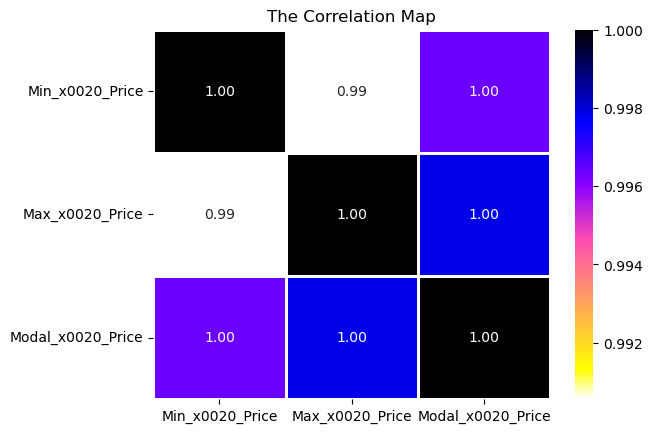

In [10]:
#Checking the Correlation map using the heatmap
sns.heatmap(data.corr(),annot=True,cmap='gnuplot2_r',fmt='.2f',linewidths=1)
plt.title("The Correlation Map")
plt.show()

# Explore Data Analysis
## Questions Asked from the Data
- To find the unique states in the data, you can use the unique() function on the 'State' column:
- To visualize the usage of states in the data, you can use the value_counts() function on the 'State' column and plot it as a bar chart
- To visualize the top 10 districts in the data, you can use the value_counts() function on the 'District' column, retrieve the top 10 districts, and plot them as a bar chart.
- To find the market that generated the most revenue, you can calculate the total revenue for each market and plot it as a pie chart.
- To visualize the distribution of maximum, minimum, and modal prices, you can create a histogram for each using the hist() function.
- To analyze the relationship between the minimum and modal prices, you can create a scatter plot using the plot() function:
- To create a data frame for visualizing the average prices of commodities along with the minimum, maximum, and modal prices, you can use the groupby() function and aggregate the data.
- To visualize the percentage of the top 10 commodities in the data, you can calculate the percentage and plot it as a pie chart.
- To find the revenue generated by each state and visualize it as a bar chart, you can multiply the minimum and maximum prices and plot the bar chart.

In [11]:
# Some Intresting Question asked the Data
# What are the Uinque states in the data
States_in_data=data['State'].unique()
print('\nThe States in the data ',States_in_data)
dominate_state=data['State'].value_counts().idxmax()
print('\nThe Dominate_state', dominate_state)
less_dominate_state=data['State'].value_counts().idxmin()
print('\nThe Leass dominate_state',  less_dominate_state)
max_and_min_price=(data['Min_x0020_Price'].min(),data['Min_x0020_Price'].max())
print('\nThe Minimum Price range between',max_and_min_price)
most_commodity=data['Commodity'].value_counts().idxmax()
print('\nThe most demanading commodity in the data',most_commodity)
min_commodity=data['Commodity'].value_counts().idxmin()
print('\nThe less demanading commodity in the data',min_commodity)


The States in the data  ['Himachal Pradesh' 'Jammu and Kashmir' 'Karnataka' 'Gujarat' 'Haryana'
 'Chattisgarh' 'Goa' 'Andhra Pradesh' 'Bihar' 'Chandigarh' 'Kerala'
 'Madhya Pradesh' 'Maharashtra' 'Rajasthan' 'Manipur' 'Meghalaya'
 'Nagaland' 'NCT of Delhi' 'Odisha' 'Punjab' 'Pondicherry' 'Uttar Pradesh'
 'Telangana' 'Tripura' 'Tamil Nadu' 'Uttrakhand' 'West Bengal']

The Dominate_state Uttar Pradesh

The Leass dominate_state Goa

The Minimum Price range between (1.0, 800000.0)

The most demanading commodity in the data Onion

The less demanading commodity in the data Same/Savi


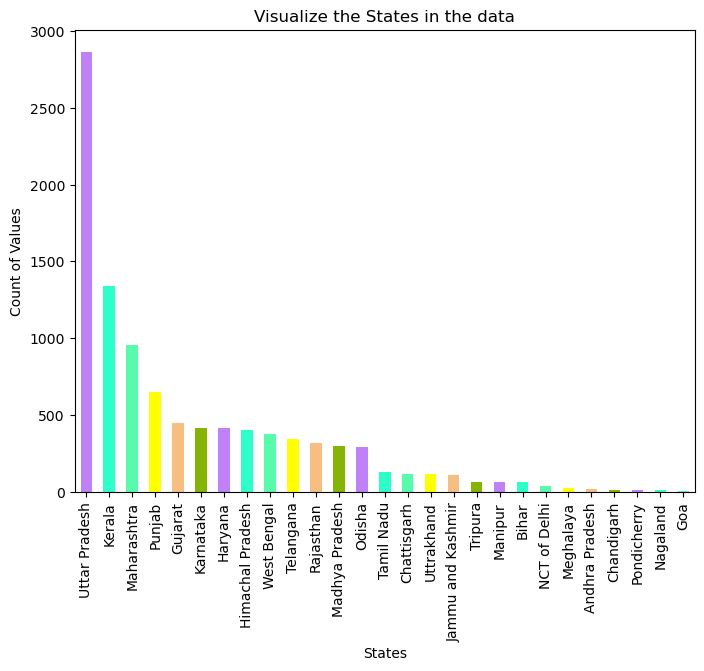

In [12]:
#Create bar chart for Stastes 
data['State'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',title="Visualize the States in the data",figsize=(8,6),color=['#BE81F7','#2EFEC8','#58FAAC','#FFFF00','#F7BE81','#86B404'])
plt.xlabel("States")
plt.ylabel("Count of Values")
plt.show()

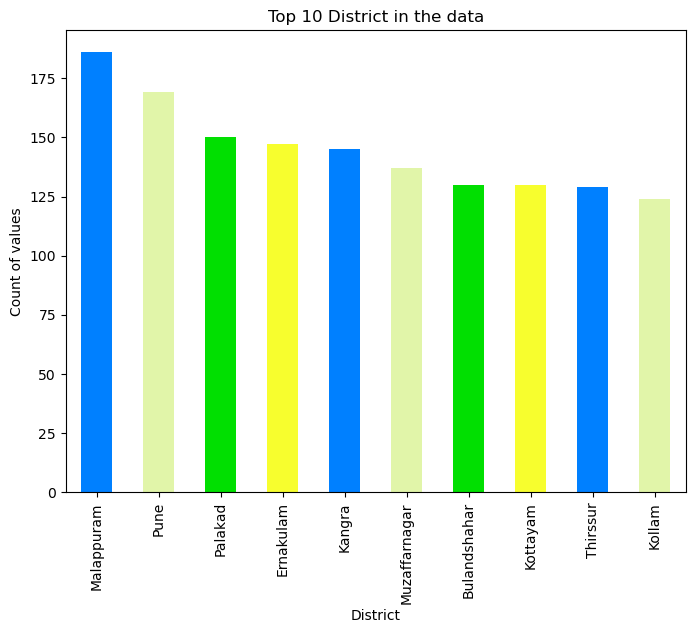

In [13]:
#Create a bar chart find the top 10 distric in the data
data['District'].value_counts().nlargest(10).sort_values(ascending=False)\
.plot(kind='bar',title='Top 10 District in the data',figsize=(8,6),color=['#0080FF','#E1F5A9','#01DF01','#F7FE2E'])
plt.xlabel("District")
plt.ylabel("Count of values")
plt.show()

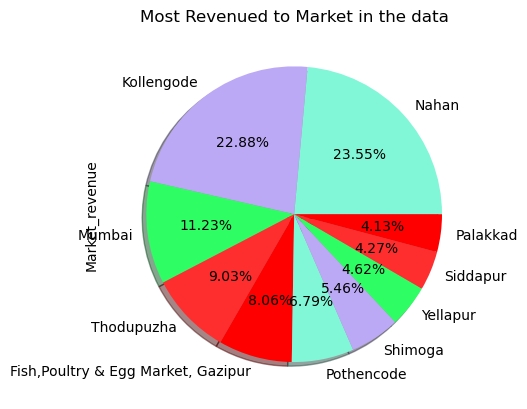

In [14]:
# Calculate the most revenue generate in the market
data['Market_revenue']=data['Min_x0020_Price']+data['Max_x0020_Price']+data['Modal_x0020_Price']
label=['Nahan','Kollengode','Mumbai','Thodupuzha','Fish,Poultry & Egg Market, Gazipur','Pothencode','Shimoga','Yellapur','Siddapur','Palakkad']
data.groupby('Market')['Market_revenue'].sum().sort_values(ascending=False).head(10)\
.plot(kind='pie',labels=label,
    colors=['#81F7D8','#BCA9F5','#2EFE64','#FE2E2E','#FF0000'],
    autopct='%1.2f%%',
    shadow=True)
plt.title("Most Revenued to Market in the data")
plt.show()

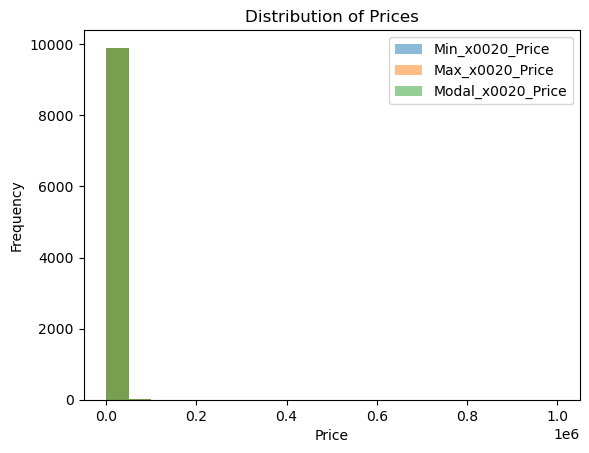

In [15]:
# Create a histogram with minimum and maximum and modal price
data[['Min_x0020_Price', 'Max_x0020_Price', 'Modal_x0020_Price']].plot(kind='hist', bins=20, alpha=0.5)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

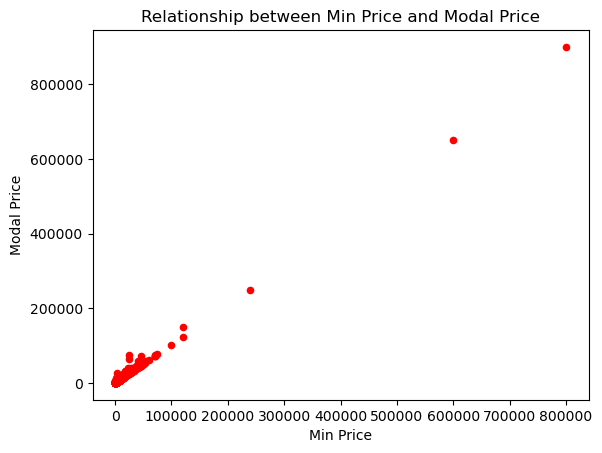

In [16]:
#Create scatter plot for min and modal price
data.plot.scatter(x='Min_x0020_Price', y='Modal_x0020_Price',color='red')
plt.xlabel('Min Price')
plt.ylabel('Modal Price')
plt.title('Relationship between Min Price and Modal Price')
plt.show()

In [17]:
# Find the Average price of the top 10 commodity in the data
avg_prices = data.groupby('Commodity')['Min_x0020_Price', 'Max_x0020_Price', 'Modal_x0020_Price'].mean()
avg_prices.head(10).style.background_gradient(cmap='tab20b')

,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
Commodity,,,
Ajwan,11000.000000,14130.000000,12337.500000
Alasande Gram,5852.500000,6380.250000,6194.000000
Almond(Badam),70000.000000,80000.000000,75000.000000
Alsandikai,3700.000000,4100.000000,3900.000000
Amaranthus,3561.290323,4102.580645,3802.903226
Amla(Nelli Kai),2868.181818,3540.909091,3218.181818
Amphophalus,3450.000000,3825.000000,3606.250000
Apple,9619.747423,11363.904939,10474.355670
Arecanut(Betelnut/Supari),30073.060000,37926.900000,35794.460000


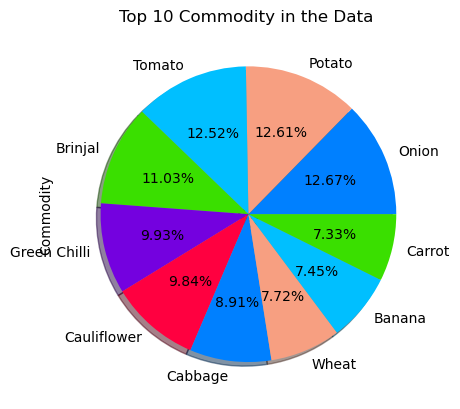

In [18]:
# Create a pie chart to visualize the top 10 commoditys in the data
color=['#0080FF','#F79F81','#00BFFF','#3ADF00','#7401DF','#FF0040']
label=['Onion','Potato','Tomato','Brinjal','Green Chilli','Cauliflower','Cabbage','Wheat','Banana','Carrot']
data['Commodity'].value_counts().sort_values(ascending=False).head(10)\
.plot(kind='pie',labels=label,
    colors=color,
    autopct='%1.2f%%',
    shadow=True)
plt.title("Top 10 Commodity in the Data ")
plt.show()

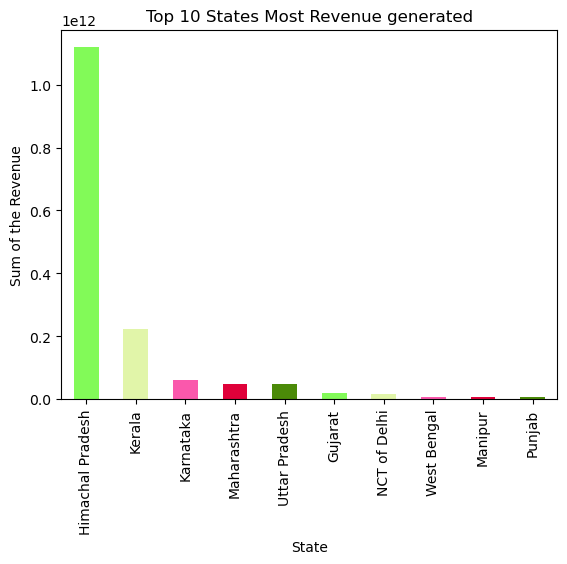

In [19]:
# To Calculated the most Revenue generated states
data['Revenue']=data['Min_x0020_Price']*data['Modal_x0020_Price']
data.groupby('State')['Revenue'].sum().sort_values(ascending=False).head(10)\
.plot(kind='bar',title='Top 10 States Most Revenue generated',color=['#82FA58','#E1F5A9','#FA58AC','#DF013A','#4B8A08'])
plt.xlabel("State")
plt.ylabel("Sum of the Revenue")
plt.show()

# Observations
#### From the analysis of the bar, pie, histogram, and scatter charts, several interesting insights can be observed:

- Uttar Pradesh emerges as the most dominating state in the data, while Goa is the least dominating state.
- Among the districts, Malappuram and Pune stand out as the dominant districts based on the bar chart.
- The pie chart depicting market revenue reveals that Nahan generates the highest revenue, followed by Kollengode and Mumbai.
- The scatter chart demonstrates a clear linear relationship between the minimum and maximum prices, indicating a strong correlation between these variables.
- According to the pie chart, the dominating commodities are Onion, Potato, and Tomato, in that order. These commodities generate a significant portion of the overall market share.

- When considering revenue, Himachal Pradesh emerges as the state with the highest revenue generation, followed by Kerala and Karnataka. These states demonstrate strong performance in terms of revenue generation in the given dataset

## Another Questions asked from the data
- To visualize the top 10 districts that provide Green Chillies, we can create a bar chart showing the districts on the x-axis and the quantity of Green Chillies on the y-axis.

- To calculate the profit or loss of Onions with the current price on a state-wise basis, we can compare the current price with the purchase price or production cost. We can then create a bar chart to represent the profit or loss for each state.

- Similarly, we can calculate the profit or loss of Apple production in different states by comparing the current price with the production cost. A bar chart can be used to visualize the profit or loss for each state.

- To identify the top 10 states that provide Rice, we can create a bar chart with the states on the x-axis and the quantity of Rice on the y-axis.

- For the top 10 districts that sold Rice at the maximum price, we can use a pie chart to represent the distribution of these districts.

- To find the variety of Rice that was sold at the minimum prices, we can analyze the data and identify the variety with the lowest prices. We can then present this information, along with the corresponding districts or states, using suitable visualization techniques.

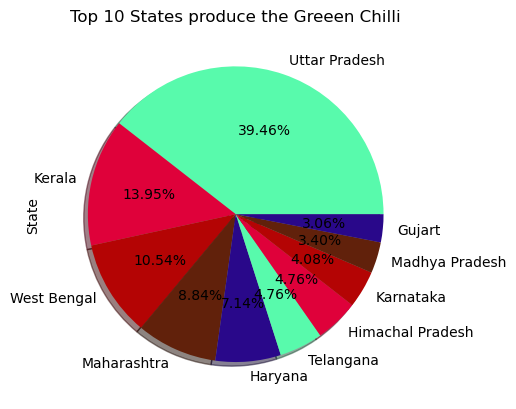

In [20]:
# Create a pie chart to Visualize Green Chilli produced the States
chilli=data[data['Commodity']=='Green Chilli']
label=['Uttar Pradesh','Kerala','West Bengal','Maharashtra','Haryana','Telangana','Himachal Pradesh','Karnataka','Madhya Pradesh','Gujart']
chilli['State'].value_counts().head(10).sort_values(ascending=False)\
.plot(kind='pie',labels=label,
    colors=['#58FAAC','#DF013A','#B40404','#61210B','#29088A'],
    autopct='%1.2f%%',
    shadow=True)
plt.title("Top 10 States produce the Greeen Chilli")
plt.show()

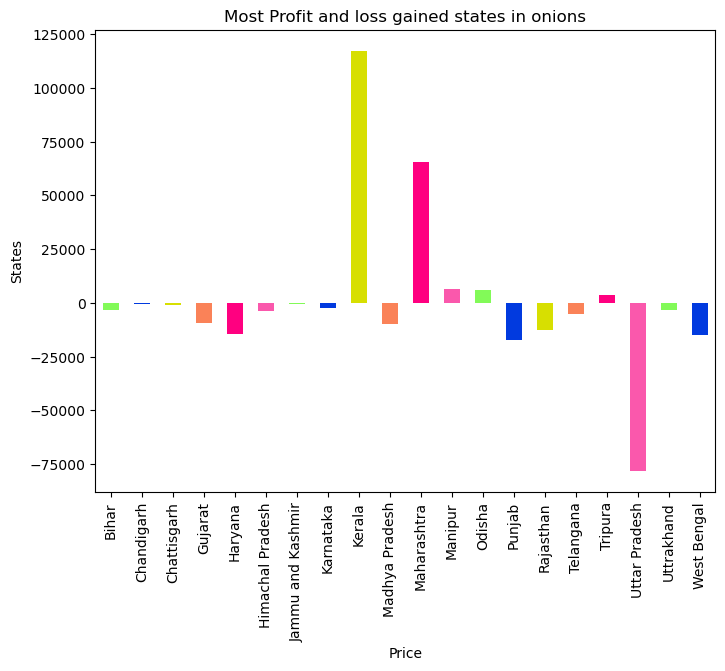

In [21]:
# Find the profit and loss states for the Onion Prices
current_maximum_price=2000
colors=['#82FA58','#013ADF','#D7DF01','#FA8258','#FF0080','#FA58AC']
onion=data[data['Commodity']=='Onion']
onion['onion_profit']=onion['Max_x0020_Price']-current_maximum_price
onion.groupby('State')['onion_profit'].sum()\
.plot(kind='bar',figsize=(8,6),title="Most Profit and loss gained states in onions",color=colors)
plt.xlabel("Price")
plt.ylabel("States")
plt.show()

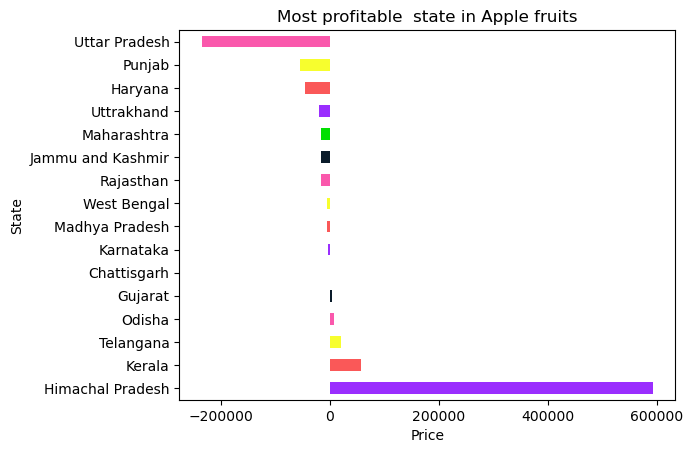

In [22]:
#To calculate the most Profitalble states in Apple fruits sales with current_apple_price
current_apple_price=8225
apple_data=data[data['Commodity']=='Apple']
apple_data['Profit']=data['Min_x0020_Price']-current_apple_price
apple_data.groupby('State')['Profit'].sum().sort_values(ascending=False)\
.plot(kind='barh',title="Most profitable  state in Apple fruits",color=['#9A2EFE','#FA5858','#F7FE2E','#FA58AC','#0A1B2A','#01DF01'])
plt.xlabel("Price")
plt.ylabel("State")
plt.show()

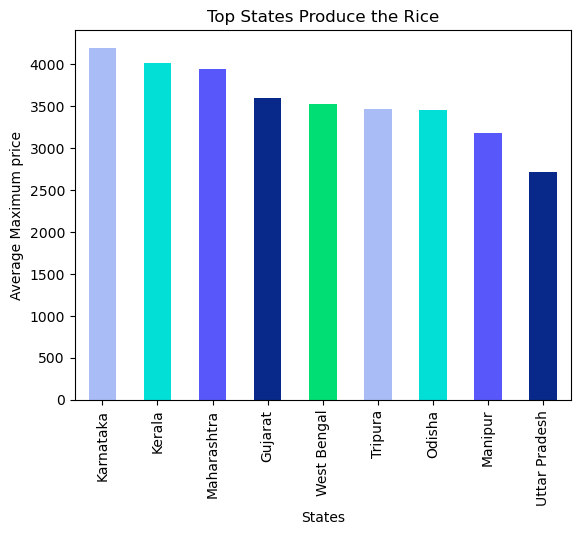

In [23]:
# Maximum price to Produced the Rice in state wise
rice=data[data['Commodity']=='Rice']
colors=['#A9BCF5','#01DFD7','#5858FA','#08298A','#01DF74']
rice.groupby('State')['Max_x0020_Price'].mean().sort_values(ascending=False).plot(kind='bar',title='Top States Produce the Rice',color=colors)
plt.xlabel("States")
plt.ylabel("Average Maximum price")
plt.show()

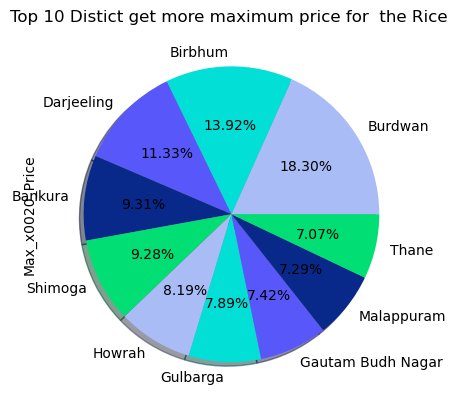

In [24]:
rice=data[data['Commodity']=='Rice']
color=['#A9BCF5','#01DFD7','#5858FA','#08298A','#01DF74']
label=['Burdwan','Birbhum','Darjeeling','Bankura','Shimoga','Howrah','Gulbarga','Gautam Budh Nagar','Malappuram','Thane']
rice.groupby('District')['Max_x0020_Price'].sum().sort_values(ascending=False).head(10)\
.plot(kind='pie',labels=label,
    colors=color,
    autopct='%1.2f%%',
    shadow=True)
plt.title("Top 10 Distict get more maximum price for  the Rice ")
plt.show()

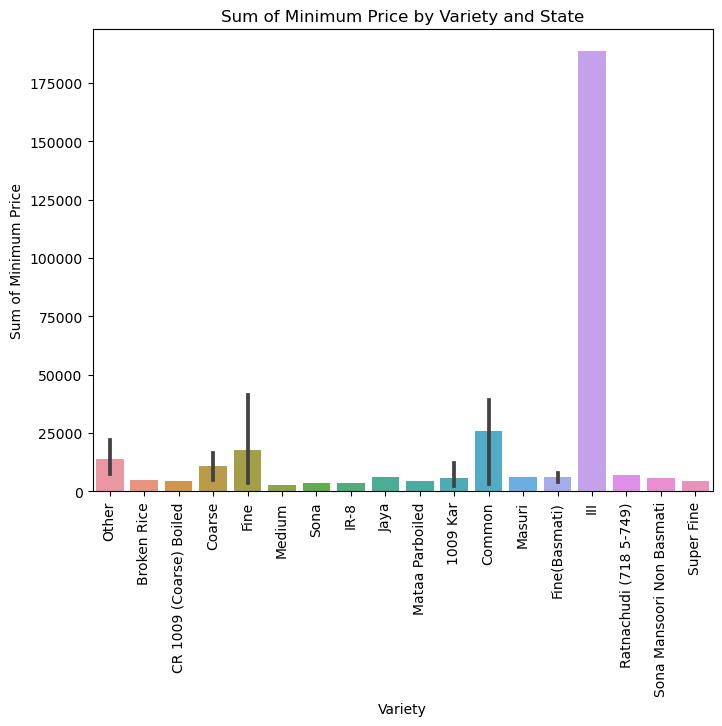

In [25]:
# Find the variety of the sold for the minimum prices 
variety_min_price_sum = rice.groupby(['State', 'Variety'])['Min_x0020_Price'].sum().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x=variety_min_price_sum['Variety'], y=variety_min_price_sum['Min_x0020_Price'])
plt.xlabel('Variety')
plt.ylabel('Sum of Minimum Price')
plt.title('Sum of Minimum Price by Variety and State')
plt.xticks(rotation=90)
plt.show()

## Observations:
- Uttar Pradesh is the top state in terms of Green Chilli production, followed by Kerala and West Bengal.
- Kerala and Maharashtra are the states that have gained more profit with Onion at the current prices, while Uttar Pradesh has experienced losses due to high prices.
- Himachal Pradesh and Kerala have earned more profit with Apple fruits at the current prices, while Uttar Pradesh and Punjab have faced losses due to lower prices.
- Karnataka, Maharashtra, and Kerala are the top states producing high-priced Rice.
- 18% of the Rice revenue is generated from Burdwan district, while 14% of the revenue is generated from Birbhum.
- Grade-3 and common varieties of Rice are sold at lower prices compared to other varieties.

## Another Question asked from data
- In the dataframe for Himachal Pradesh, we can find the commodity with the highest average price.
- Similarly, in the dataframe for Telangana state, we can identify the commodity with the highest average price.
- We can determine the available commodities in Andhra Pradesh.
- By analyzing the data for Andhra Pradesh, we can calculate the revenue generated in each district.
- We can identify the top 10 markets with the average minimum price.
- We can determine which states are the largest producers of Banana items.
- To find the average maximum price of the top 10 districts.





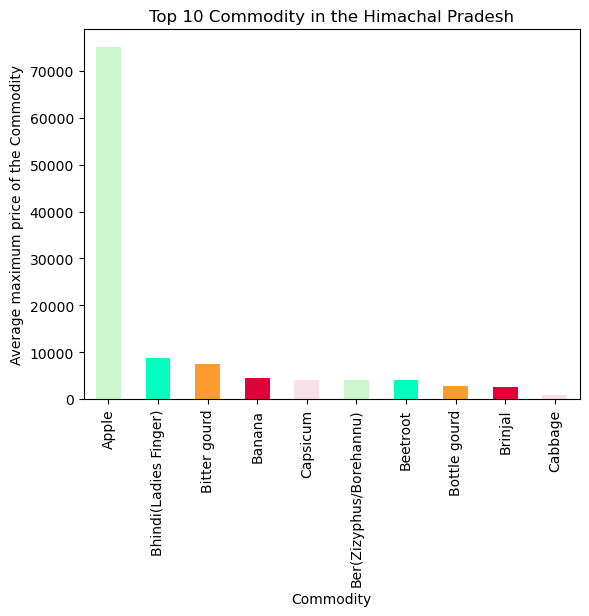

In [26]:
# Top 10 Commodity mininmum price in the Himachal Pradesh 
Himachal=data[data['State']=='Himachal Pradesh']
Himachal.groupby('Commodity')['Max_x0020_Price'].mean().head(10).sort_values(ascending=False)\
.plot(kind='bar',title="Top 10 Commodity in the Himachal Pradesh",color=['#CEF6CE','#00FFBF','#FE9A2E','#DF013A','#F8E0E6'])
plt.xlabel("Commodity")
plt.ylabel("Average maximum price of the Commodity")
plt.show()

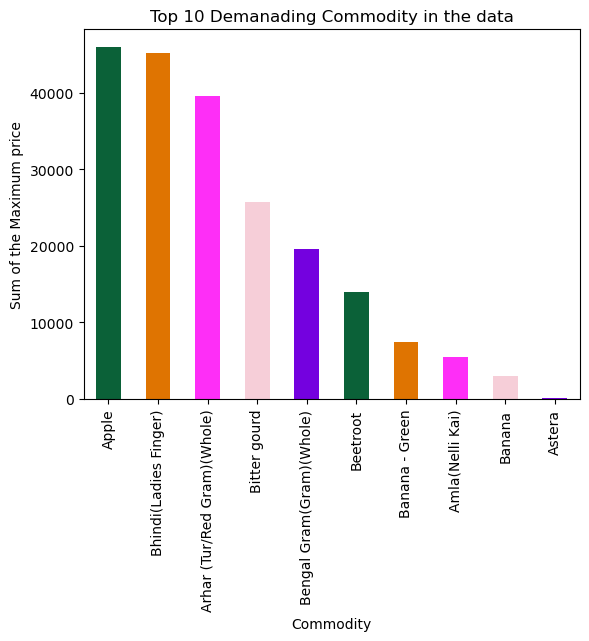

In [27]:
# Demanding Commodity in the Telanagana
telangana=data[data['State']=='Telangana']
telangana.groupby('Commodity')['Max_x0020_Price'].sum().head(10).sort_values(ascending=False)\
.plot(kind='bar',title='Top 10 Demanading Commodity in the data',color=['#0B6138','#DF7401','#FE2EF7','#F6CED8','#7401DF'])
plt.xlabel("Commodity")
plt.ylabel("Sum of the Maximum price")
plt.show()

In [28]:
# Find the top 10 Minimum and maximum values of the commodity with minimum prices
commodity_stats = data.groupby('Commodity')['Min_x0020_Price'].agg(['min', 'max'])
commodity_stats.head(10).style.background_gradient(cmap='nipy_spectral_r')

,min,max
Commodity,,
Ajwan,9500.000000,12500.000000
Alasande Gram,4400.000000,6535.000000
Almond(Badam),70000.000000,70000.000000
Alsandikai,3700.000000,3700.000000
Amaranthus,1200.000000,20000.000000
Amla(Nelli Kai),800.000000,6100.000000
Amphophalus,1600.000000,5000.000000
Apple,700.000000,600000.000000
Arecanut(Betelnut/Supari),5786.000000,52629.000000


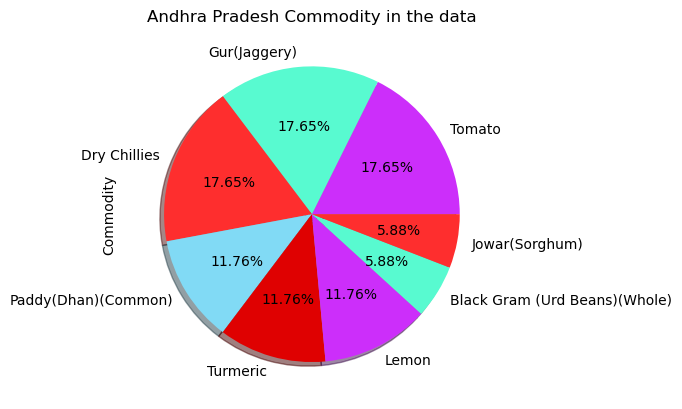

In [29]:
# Create pie chart to understand the Commodity in Andhra Pradesh
andhra_pradesh=data[data['State']=='Andhra Pradesh']
andhra_pradesh['Commodity'].value_counts().sort_values(ascending=False)\
.plot(kind='pie',labels=['Tomato','Gur(Jaggery)','Dry Chillies','Paddy(Dhan)(Common)','Turmeric','Lemon','Black Gram (Urd Beans)(Whole)','Jowar(Sorghum)'],
    colors=['#CC2EFA','#58FAD0','#FE2E2E','#81DAF5','#DF0101'],
    autopct='%1.2f%%',
    shadow=True)
plt.title("Andhra Pradesh Commodity in the data")
plt.show()

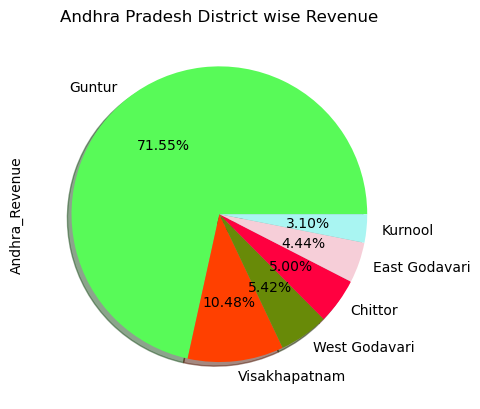

In [30]:
# Create a pie chart to find the District wise revenue generate in the andhra Pradesh
andhra_pradesh['Andhra_Revenue']=andhra_pradesh['Min_x0020_Price']+andhra_pradesh['Max_x0020_Price']+andhra_pradesh['Modal_x0020_Price']
label=['Guntur','Visakhapatnam','West Godavari','Chittor','East Godavari','Kurnool']
color=['#58FA58','#FF4000','#688A08','#FF0040','#F6CED8','#A9F5F2']
andhra_pradesh.groupby('District')['Andhra_Revenue'].sum().sort_values(ascending=False)\
.plot(kind='pie',labels=label,
    colors=color,
    autopct='%1.2f%%',
    shadow=True)
plt.title("Andhra Pradesh District wise Revenue")
plt.show()

In [31]:
market_price_range = data.groupby('Market')['Min_x0020_Price', 'Max_x0020_Price'].apply(lambda x: x.max() - x.min())
market_price_range.head(10).style.background_gradient(cmap='twilight_shifted')

,Min_x0020_Price,Max_x0020_Price
Market,,
Aarni,0.000000,0.000000
Abhanpur,575.000000,570.000000
Abohar,7450.000000,11950.000000
Achalda,13450.000000,13550.000000
Adilabad,0.000000,0.000000
Adilabad(Rythu Bazar),4000.000000,4000.000000
Adimali,14000.000000,15000.000000
Agra,9370.000000,9400.000000
Ahmedgarh,1400.000000,1400.000000


In [32]:
# Group data by 'State' and analyze aggregated information
state_stats = data.groupby('State').agg({'Min_x0020_Price': ['mean', 'median', 'max', 'min']})
state_stats.style.background_gradient(cmap='inferno')

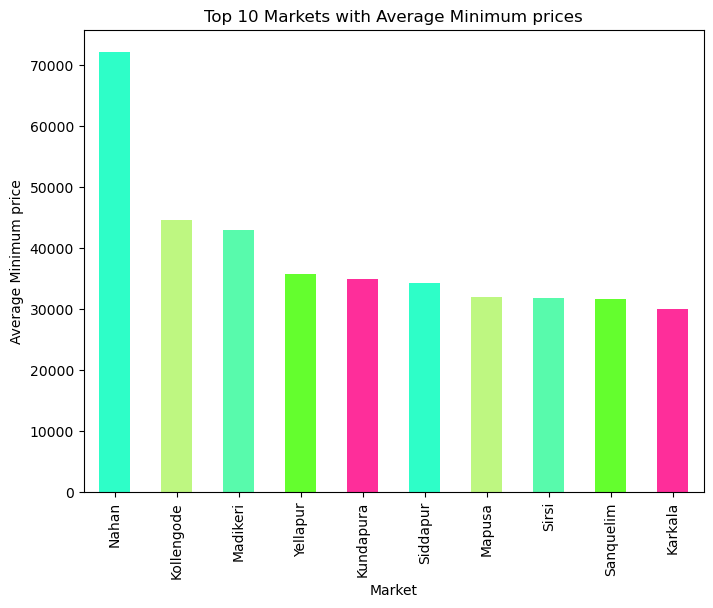

In [33]:
# Creat a bar chart to find the top 10 market with minimum price
data.groupby('Market')['Min_x0020_Price'].mean().nlargest(10).sort_values(ascending=False)\
.plot(kind='bar',title="Top 10 Markets with Average Minimum prices",figsize=(8,6),color=['#2EFEC8','#BEF781','#58FAAC','#64FE2E','#FE2E9A'])
plt.xlabel("Market")
plt.ylabel("Average Minimum price")
plt.show()

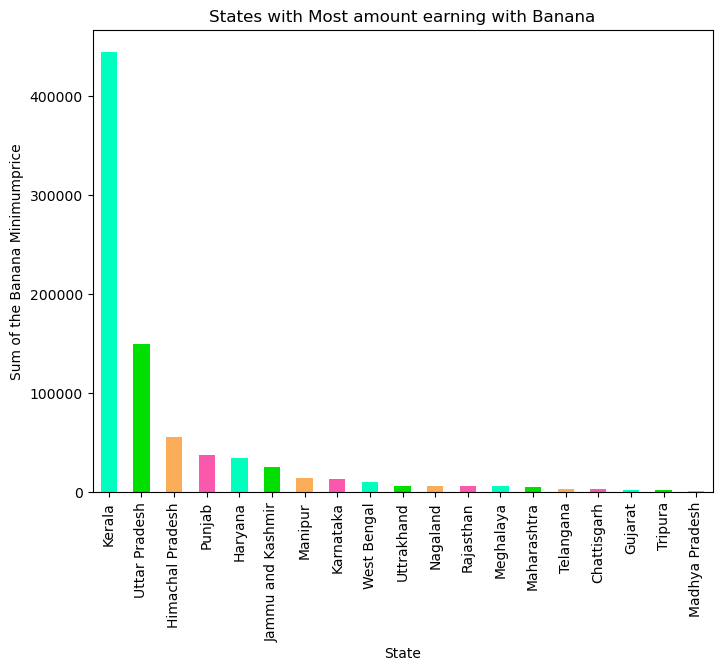

In [34]:
# To calcualte the Banana price with state wise using the grouby function
# Create a data frame with banana
banana=data[data['Commodity']=='Banana']
#Grouby the states with Minimumprice
sum_of_banana_prices_with_state_wise=banana.groupby('State')['Min_x0020_Price'].sum()
sum_of_banana_prices_with_state_wise.sort_values(ascending=False)\
.plot(kind='bar',title="States with Most amount earning with Banana",figsize=(8,6),color=['#00FFBF','#01DF01','#FAAC58','#FA58AC'])
plt.xlabel("State")
plt.ylabel("Sum of the Banana Minimumprice")
plt.show()

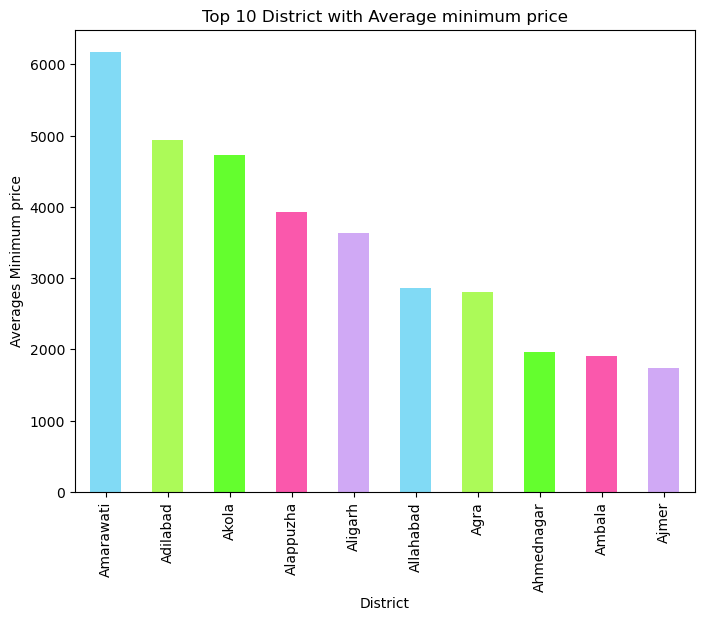

In [35]:
# What are the top 10 distric with  average Min_price
data.groupby('District')['Min_x0020_Price'].mean().head(10).sort_values(ascending=False)\
.plot(kind='bar',title='Top 10 District with Average minimum price',figsize=(8,6),color=['#81DAF5','#ACFA58','#64FE2E','#FA58AC','#D0A9F5'])
plt.xlabel("District")
plt.ylabel("Averages Minimum price")
plt.show()

## Observations:
- From the above charts, we have observed several insights in the data.
- In Himachal Pradesh, Apple is the most sold commodity with a high average minimum price, followed by Ladies Finger.
- In Telangana, Apple is also the most sold commodity with a high average minimum price, followed by Ladies Finger.
- 18% of the commodities available in Andhra Pradesh are Tomato, Gur, and Dry Chillies.
- Guntur generates 72% of the revenue in Andhra Pradesh, while Visakhapatnam contributes 10% of the revenue.
- Nahan Market has the highest average prices in the data, followed by Kollengode.
- Kerala and Uttar Pradesh are both states that produce commodities with higher average minimum prices compared to others.
- Amaravati is the district with the highest average prices in the data, followed by Adilabad.

In [36]:
#Some Sample Questions asked for the data
state_with_highest_min_price = data.loc[data['Min_x0020_Price'].idxmax(), 'State']
state_with_lowest_min_price = data.loc[data['Min_x0020_Price'].idxmin(), 'State']
print("State with the highest minimum price:", state_with_highest_min_price)
print("State with the lowest minimum price:", state_with_lowest_min_price)
district_with_highest_min_price = data.loc[data['Max_x0020_Price'].idxmax(), 'District']
district_with_lowest_min_price = data.loc[data['Max_x0020_Price'].idxmin(), 'District']
print("District with the highest minimum price:", district_with_highest_min_price)
print("District with the lowest minimum price:", district_with_lowest_min_price)
commodity_with_highest_min_price = data.loc[data['Max_x0020_Price'].idxmax(), 'Commodity']
commodity_with_lowest_min_price = data.loc[data['Max_x0020_Price'].idxmin(), 'Commodity']
print("Commodity with the highest minimum price:", commodity_with_highest_min_price)
print("Commodity with the lowest minimum price:", commodity_with_lowest_min_price)


State with the highest minimum price: Himachal Pradesh
State with the lowest minimum price: Maharashtra
District with the highest minimum price: Sirmore
District with the lowest minimum price: Sholapur
Commodity with the highest minimum price: Grapes
Commodity with the lowest minimum price: Lime


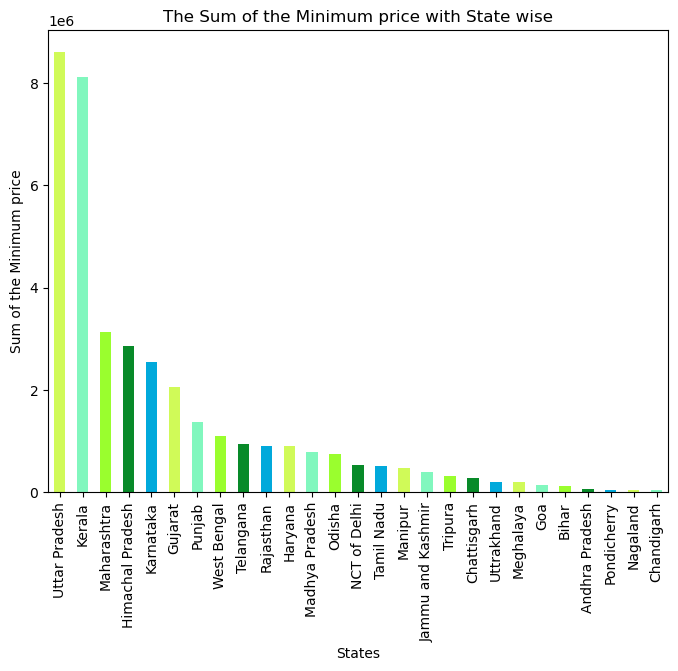

In [37]:
#Create a bar chart to understand the Which states have the highest minimum price
data.groupby('State')['Min_x0020_Price'].sum().sort_values(ascending=False)\
.plot(kind='bar',title="The Sum of the Minimum price with State wise",figsize=(8,6),color=['#D0FA58','#81F7BE','#9AFE2E','#088A29','#01A9DB'])
plt.xlabel("States")
plt.ylabel("Sum of the Minimum price")
plt.show()

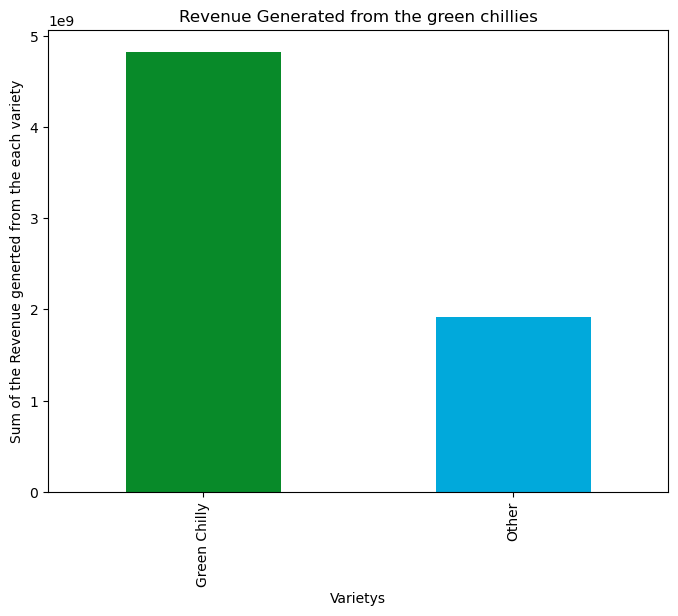

In [41]:
# Created bar chart to find the Most revenue geneted from the chilli varietys
chilli=data[data['Commodity']=='Green Chilli']
chilli.groupby('Variety')['Revenue'].sum().sort_values(ascending=False)\
.plot(kind='bar',title="Revenue Generated from the green chillies",figsize=(8,6),color=['#088A29','#01A9DB'])
plt.xlabel("Varietys")
plt.ylabel("Sum of the Revenue generted from the each variety")
plt.show()

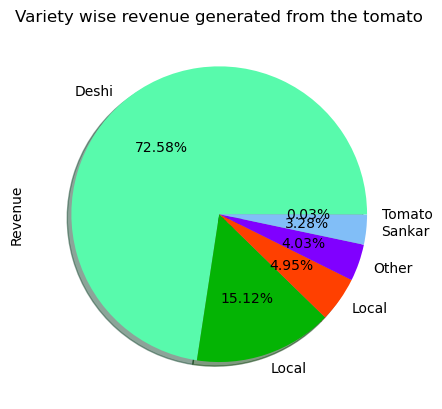

In [39]:
# To Visualize the Revenue from the each variety of the tomato
tomato=data[data['Commodity']=='Tomato']
label=['Deshi','Local','Local','Other','Sankar','Tomato']
color=['#58FAAC','#04B404','#FF4000','#8000FF','#81BEF7']
tomato.groupby('Variety')['Revenue'].sum().sort_values(ascending=False)\
.plot(kind='pie',labels=label,
    colors=color,
    autopct='%1.2f%%',
    shadow=True)
plt.title("Variety wise revenue generated from the tomato")
plt.show()

## Observations:
- Uttar Pradesh and Kerala have the highest sum of minimum prices in the data.
- Green Chillies generate more revenue compared to other chilli varieties.
- In the case of Tomatoes, 73% of the revenue is generated by the Desi variety, while the Local variety contributes only 15% of the revenue.